# EDA

## Initialization

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\anaconda\envs\geopandas_env\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
import pandas as pd
import numpy as np
import sys
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import igraph

from geopandas import GeoDataFrame
from pyrosm import OSM

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
# Self-made modules
import helpers as hp

In [4]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Inputs

In [72]:
buildings_int_path = '../data/02_intermediate/buildings_data/'
plz_ags_csv = '../data/01_raw/zuordnung_plz_ort_landkreis.csv'

# Demographics
ags_living_csv = '../data/01_raw/de_living_2019.csv'
ags_population_csv = '../data/01_raw/de_population_2019.csv'

In [6]:
ags_living = pd.read_csv(ags_living_csv, 
                         sep = ';', 
                         encoding = 'cp1250', 
                         dtype= {'1_Auspraegung_Code':str},
                         low_memory = False)
ags_population = pd.read_csv(ags_population_csv, 
                             sep = ';', 
                             dtype= {'1_Auspraegung_Code':str},
                             encoding = 'cp1250', 
                             low_memory = False)

In [73]:
# Contain local AGS codes (no regional)
plz_ags = pd.read_csv(plz_ags_csv, dtype= {'plz': str, 'ags': str})

In [89]:
test='1059187'
test.zfill(8)

'01059187'

In [76]:
plz_ags[plz_ags.ags == '01059187']

,osm_id,ags,plz,bundesland


## PLZ AGS EDA

In [8]:
plz_ags.head()

,osm_id,ags,ort,plz,landkreis,bundesland
0,1104550,08335001,Aach,78267,Landkreis Konstanz,Baden-Württemberg
1,1255910,07235001,Aach,54298,Landkreis Trier-Saarburg,Rheinland-Pfalz
2,62564,05334002,Aachen,52062,Städteregion Aachen,Nordrhein-Westfalen
3,62564,05334002,Aachen,52064,Städteregion Aachen,Nordrhein-Westfalen
4,62564,05334002,Aachen,52066,Städteregion Aachen,Nordrhein-Westfalen


In [9]:
ags_bundesland = pd.DataFrame(plz_ags[['ags','bundesland']]
                              .drop_duplicates()
                              .groupby('bundesland')[['ags']]
                              .size()
                              .to_frame('ags_count')
                              .reset_index())

In [10]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

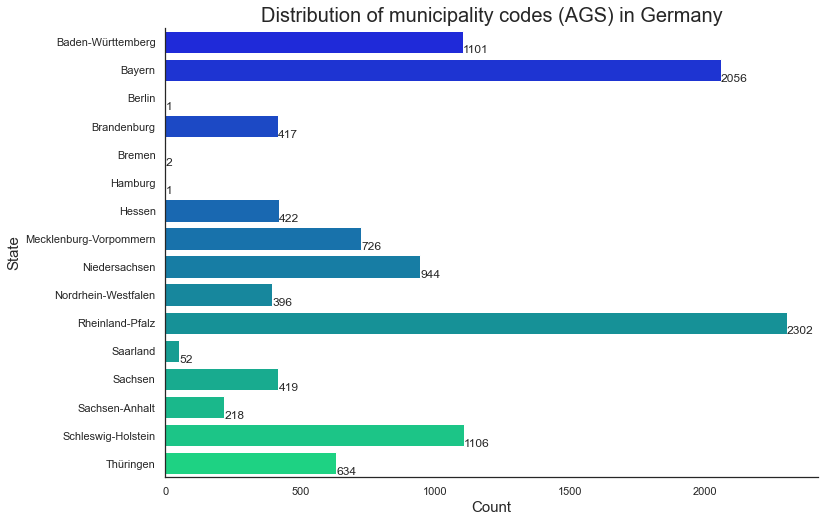

In [42]:
sns.set_style('white') 

g = sns.barplot(data = ags_bundesland,
                 y = 'bundesland',
                 x = 'ags_count',
                 palette = 'winter',
                 orient = 'h')

show_values_on_bars(g, "h", 0.5)

plt.title('Distribution of municipality codes (AGS) in Germany', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('State', fontsize = 15)
sns.despine()

AGS Living

In [12]:
ags_living.rename(columns = {'1_Auspraegung_Code':'ags',
                            '1_Auspraegung_Label':'place',
                            '2_Auspraegung_Label':'indication',
                            '2_Merkmal_Label':'measurement_type'}, inplace = True)

In [13]:
# Filter to get only local AGS codes
ags_living = ags_living[ags_living.ags.isin(plz_ags.ags)]

In [14]:
ags_living.ags.nunique()

10689

AGS Population

In [15]:
ags_population.rename(columns = {'1_Auspraegung_Code':'ags',
                                 '1_Auspraegung_Label':'place',
                                 '2_Auspraegung_Label':'gender',
                                 '3_Auspraegung_Label':'age_group'}, inplace = True)

# Filter to get only local AGS codes
ags_population = ags_population[ags_population.ags.isin(plz_ags.ags)]

In [16]:
ags_population.ags.nunique()

10796

In [17]:
ags_population[ags_population.ags == '01004000']

,Statistik_Code,Statistik_Label,Zeit_Code,Zeit_Label,Zeit,1_Merkmal_Code,1_Merkmal_Label,ags,place,2_Merkmal_Code,2_Merkmal_Label,2_Auspraegung_Code,gender,3_Merkmal_Code,3_Merkmal_Label,3_Auspraegung_Code,age_group,BEVSTD__Bevoelkerungsstand__Anzahl
162,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT000B03,unter 3 Jahre,2145
163,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT003B06,3 bis unter 6 Jahre,2167
164,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT006B10,6 bis unter 10 Jahre,2814
165,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT010B15,10 bis unter 15 Jahre,3726
166,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT015B18,15 bis unter 18 Jahre,2268
167,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT018B20,18 bis unter 20 Jahre,1893
168,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT020B25,20 bis unter 25 Jahre,4826
169,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT025B30,25 bis unter 30 Jahre,5098
170,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT030B35,30 bis unter 35 Jahre,5157
171,12411,Fortschreibung des Bevölkerungsstandes,STAG,Stichtag,31.12.2019,GEMEIN,Gemeinden,01004000,"Neumünster, krsfr. Stadt",GES,Geschlecht,NaN,Insgesamt,ALTX20,Altersgruppen (unter 1 bis 75 u.m.),ALT035B40,35 bis unter 40 Jahre,4657


## Plot examples

In [18]:
id = 10

In [57]:
boundary_id = '01059187'
df = pd.read_csv(os.path.join(buildings_int_path, f'buildings_ags_{boundary_id}.csv'))

In [58]:
df.shape

(1476, 18)

In [59]:
df.building_types.value_counts()

to_be_classified     890
accessory_storage    462
residential          110
accessory_supply       7
public                 4
commercial             3
Name: building_types, dtype: int64

## Get the number of residential buildings from officials

In [60]:
ags_living['place'] = ags_living['place'].apply(lambda x: x.strip())

In [61]:
# Total buildings in the area that are classified as "residentials"
official_res_count = int(ags_living[(ags_living.ags == boundary_id) &
                                    (ags_living.measurement_type == 'Wohngebäude nach Anzahl der Wohnungen') &
                                    (ags_living.indication == 'Insgesamt')].BAUNW9__Wohngebaeude__Anzahl.iloc[0])
official_res_count

568

In [62]:
ags_place = ags_living[ags_living.ags == boundary_id].place.iloc[0]
ags_place

'Boren'

In [68]:
# OSM residential buildings count
osm_count = len(df[df.building_types == 'residential'])
osm_unidentified_count = len(df[df.building_types == 'to_be_classified'])

In [64]:
# differences in number
abs_diff = abs(osm_res_count-official_res_count)
# diff in percentage
pct_diff = round((abs_diff/official_res_count)*100,2)

In [71]:
f'{abs_diff} buildings & {pct_diff}% diff'

'458 buildings & 80.63% diff'

# Diff dist

Get diff distribution of real residential buildings vs osm buildings

In [90]:
res_diff_path = '../data/08_reporting/residential_diff.csv'

In [91]:
res_diff = pd.read_csv(res_diff_path,
                      dtype = {'ags':str})

In [98]:
res_diff = res_diff.drop_duplicates()

In [105]:
res_diff[res_diff.pct_diff == 100]

,ags,ags_place,osm_residential_count,osm_unidentified_count,official_residential_count,abs_diff,pct_diff
5,16069001,Ahlstädt,0,130,42,42,100.0
12,16070001,Alkersleben,0,330,109,109,100.0
17,13072002,Alt Bukow,0,351,181,181,100.0
29,12060012,Althüttendorf,0,485,243,243,100.0
30,13072004,Altkalen,0,701,297,297,100.0
...,...,...,...,...,...,...,...
10664,08417078,Zimmern unter der Burg,0,200,165,165,100.0
10671,13071170,Zirzow,0,204,118,118,100.0
10687,13076163,Zülow,0,125,56,56,100.0
10692,13074091,Züsow,0,229,131,131,100.0


In [38]:
res_diff.pct_diff.max()

288.0

C:\anaconda\envs\geopandas_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


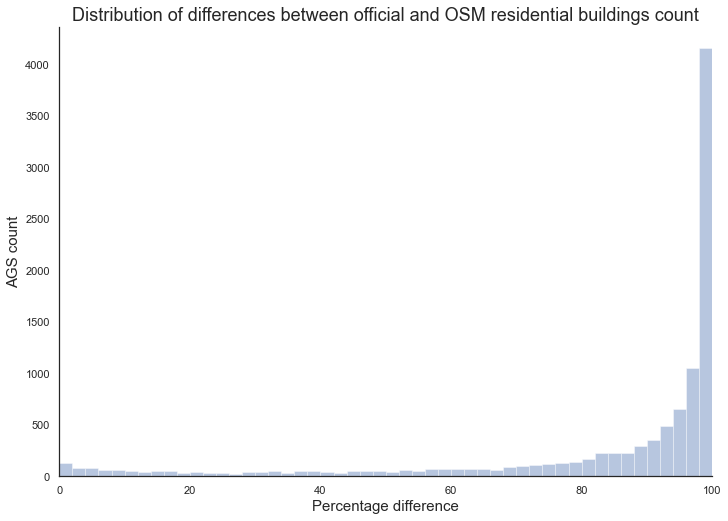

In [101]:
sns.distplot(res_diff[res_diff.pct_diff <=100].pct_diff,
            kde = False)
plt.xlim(0,100)
plt.title('Distribution of differences between official and OSM residential buildings count', fontsize = 18)
plt.xlabel('Percentage difference', fontsize = 15)
plt.ylabel('AGS count', fontsize = 15)
sns.despine()

In [ ]:
from shapely import wkt
# Filter out NaN
df = df[df.geometry.isna() == False].reset_index(drop = True)

# Convert geometry to GeoSeries
df['geometry'] = df['geometry'].apply(wkt.loads)
# Convert to GeoPandas type
df_geo = GeoDataFrame(df, geometry='geometry')

In [ ]:
df_geo = hp._swap_2_cols(df_geo, 'id','center.lon')
df_geo = hp._swap_2_cols(df_geo, 'type','center.lat')

df_geo.rename(columns = {'center.lat':'lat',
                        'center.lon':'lon'}, inplace = True)

In [ ]:
# Plot
ax =   df_geo.plot(column='building_types', 
                   markersize=3, 
                   figsize=(12,20), 
                   legend=True, 
                   legend_kwds=dict(loc='upper left', ncol=1, bbox_to_anchor=(1, 1)))